### ANN - Iris
    - TensorFlow & Keras
    - 3 class (Multi-class Classification)

In [21]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

### Dataset

In [22]:
df = sns.load_dataset('iris')
df.sample(5, random_state=1)

,sepal_length,sepal_width,petal_length,petal_width,species
14,5.8,4.0,1.2,0.2,setosa
98,5.1,2.5,3.0,1.1,versicolor
75,6.6,3.0,4.4,1.4,versicolor
16,5.4,3.9,1.3,0.4,setosa
131,7.9,3.8,6.4,2.0,virginica


In [23]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

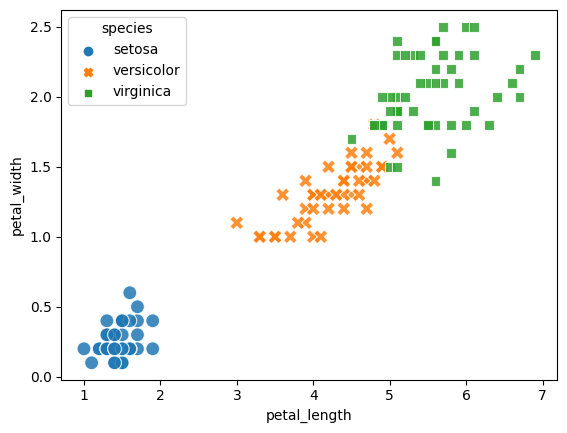

In [24]:
sns.scatterplot(x = 'petal_length', y='petal_width', data=df, hue='species', style='species',
                alpha=0.85, edgecolor='w', s=100)

plt.show()

In [25]:
class_names = np.unique(df.species)
class_names

array(['setosa', 'versicolor', 'virginica'], dtype=object)

### X and y

In [26]:
X = df.drop(['species'], axis=1)
X.sample(6, random_state=1)

,sepal_length,sepal_width,petal_length,petal_width
14,5.8,4.0,1.2,0.2
98,5.1,2.5,3.0,1.1
75,6.6,3.0,4.4,1.4
16,5.4,3.9,1.3,0.4
131,7.9,3.8,6.4,2.0
56,6.3,3.3,4.7,1.6


In [27]:
X[:5]

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [28]:
y = df.species

In [29]:
y[:5]

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

### Feature Scaling

In [30]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_sc = sc.fit_transform(X)
X_sc[:4]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ]])

### Train-test Split

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.25, random_state=1)

X_train.shape, X_test.shape

((112, 4), (38, 4))

In [34]:
y_train.shape, y_test.shape

((112,), (38,))

In [35]:
y_train[:5]

54     versicolor
108     virginica
112     virginica
17         setosa
119     virginica
Name: species, dtype: object

In [36]:
y_test[:5]

14         setosa
98     versicolor
75     versicolor
16         setosa
131     virginica
Name: species, dtype: object

### One-Hot Encoding

In [37]:
from tensorflow.keras.utils import to_categorical

def one_hot_encode(arr):
    categories, ids = np.unique(arr, return_inverse=True)
    print(categories)
    return to_categorical(ids, len(categories))
    
y_train_1h = one_hot_encode(y_train).astype('int')
y_test_1h = one_hot_encode(y_test).astype('int')

['setosa' 'versicolor' 'virginica']
['setosa' 'versicolor' 'virginica']


In [38]:
y_train_1h[:4]

array([[0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0]])

In [39]:
y_test_1h[:4]

array([[1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0]])

In [40]:
y_train_1h.shape, y_test_1h.shape

((112, 3), (38, 3))

In [41]:
X_train[:4]

array([[ 0.79566902, -0.59237301,  0.47857113,  0.3957741 ],
       [ 1.03800476, -1.28296331,  1.16062026,  0.79067065],
       [ 1.15917263, -0.13197948,  0.99010798,  1.18556721],
       [-0.90068117,  1.01900435, -1.34022653, -1.18381211]])

In [43]:
y_train[:4]

54     versicolor
108     virginica
112     virginica
17         setosa
Name: species, dtype: object

In [44]:
y_train_1h[:4]

array([[0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0]])

### Model
    - Create a Model
    - Compile
    - Train

### Create a Model

In [46]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense 

model = Sequential()

hidden_node = 64
model.add(Dense(hidden_node, activation='relu', input_shape=(4,)))

model.add(Dense(3, activation='softmax'))

In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                320       
                                                                 
 dense_1 (Dense)             (None, 3)                 195       
                                                                 
Total params: 515 (2.01 KB)
Trainable params: 515 (2.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [48]:
model.output_shape

(None, 3)

### Compile and Train

In [51]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [52]:
import time

start = time.time()
history = model.fit(X_train, y_train_1h, epochs=80, batch_size=8, verbose=1, validation_split=0.25)
end = time.time()

print(f"Time Taken {end - start:.3f} secs")

Epoch 1/80
11/11 [==============================] - 4s 47ms/step - loss: 1.0207 - accuracy: 0.4286 - val_loss: 1.0190 - val_accuracy: 0.6071
Epoch 2/80
11/11 [==============================] - 0s 7ms/step - loss: 0.8675 - accuracy: 0.8095 - val_loss: 0.9107 - val_accuracy: 0.7143
Epoch 3/80
11/11 [==============================] - 0s 8ms/step - loss: 0.7447 - accuracy: 0.8333 - val_loss: 0.8279 - val_accuracy: 0.7500
Epoch 4/80
11/11 [==============================] - 0s 8ms/step - loss: 0.6471 - accuracy: 0.8452 - val_loss: 0.7612 - val_accuracy: 0.7143
Epoch 5/80
11/11 [==============================] - 0s 7ms/step - loss: 0.5767 - accuracy: 0.8452 - val_loss: 0.7071 - val_accuracy: 0.7143
Epoch 6/80
11/11 [==============================] - 0s 19ms/step - loss: 0.5218 - accuracy: 0.8452 - val_loss: 0.6616 - val_accuracy: 0.7143
Epoch 7/80
11/11 [==============================] - 0s 15ms/step - loss: 0.4806 - accuracy: 0.8452 - val_loss: 0.6320 - val_accuracy: 0.7143
Epoch 8/80
11/11 

### Evaluate

In [57]:
score = model.evaluate(X_test, y_test_1h, verbose=0)

print("Test loss", score[0])
print(f"Test accuracy : {score[1]:.4f}")

Test loss 0.10485611855983734
Test accuracy : 0.9737


In [60]:
model.metrics_names

['loss', 'accuracy']

In [62]:
y_pred = model.predict(X_test)

y_pred[:4]
y_pred[:4].round(3)

2/2 [==============================] - 0s 4ms/step


array([[0.998, 0.002, 0.   ],
       [0.079, 0.902, 0.02 ],
       [0.005, 0.926, 0.068],
       [0.999, 0.001, 0.   ]], dtype=float32)

In [64]:
y_pred_cat = np.argmax(y_pred, axis=1)
y_pred_cat[:4]

array([0, 1, 1, 0], dtype=int64)